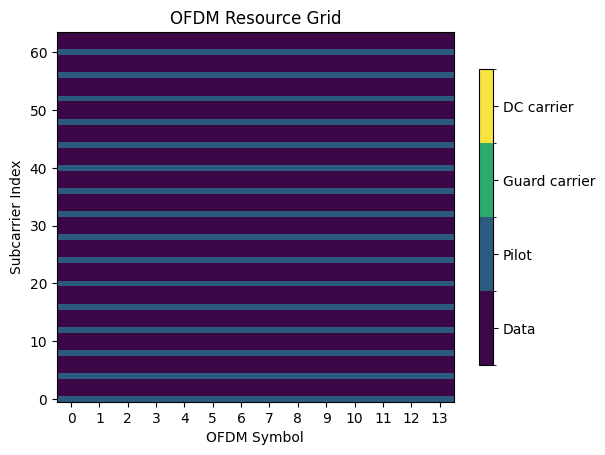

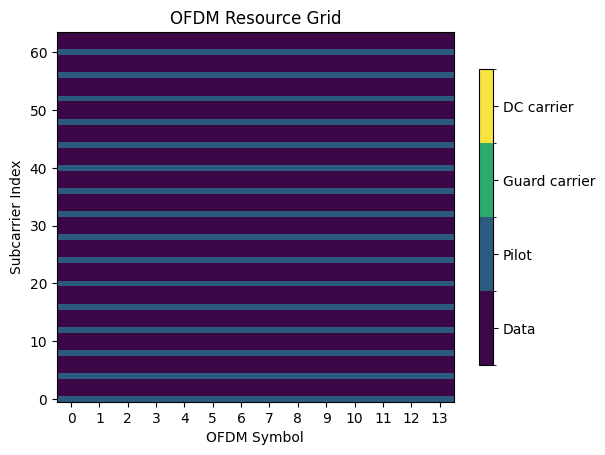

In [6]:
import numpy as np
import sionna as sn

# Your existing parameters
NUM_UT = 1  # Example value for num_tx
NUM_STREAMS_PER_TX = 1  # Example value for num_streams_per_tx
num_ofdm_symbols = 14
fft_size = 64
num_effective_subcarriers = fft_size  # Assuming no guard subcarriers for simplicity

# Create mask: pilots on every 4th subcarrier in each OFDM symbol
mask = np.zeros([NUM_UT, NUM_STREAMS_PER_TX, num_ofdm_symbols, num_effective_subcarriers], dtype=bool)
for i in range(num_ofdm_symbols):
    mask[:, :, i, ::4] = True  # Pilot subcarriers at indices 0, 4, 8, ..., 60

# Define pilot symbols (e.g., QPSK constellation)
constellation = sn.phy.mapping.Constellation("qam", num_bits_per_symbol=2)
pilots = constellation.points
# Calculate number of pilot positions and tile pilots to match
num_pilots = np.sum(mask)
pilots = np.tile(pilots, (NUM_UT, NUM_STREAMS_PER_TX, num_pilots // len(pilots) + 1))[:, :, :num_pilots]

# Create custom PilotPattern
pilot_pattern = sn.phy.ofdm.PilotPattern(mask=mask, pilots=pilots)

# Update ResourceGrid with custom pilot pattern
RESOURCE_GRID = sn.phy.ofdm.ResourceGrid(
    num_ofdm_symbols=14,
    fft_size=64,
    subcarrier_spacing=15.625e4,
    num_tx=NUM_UT,
    num_streams_per_tx=NUM_STREAMS_PER_TX,
    cyclic_prefix_length=16,
    pilot_pattern=pilot_pattern  # Use custom pattern instead of "kronecker"
)

# Visualize the resource grid
RESOURCE_GRID.show()

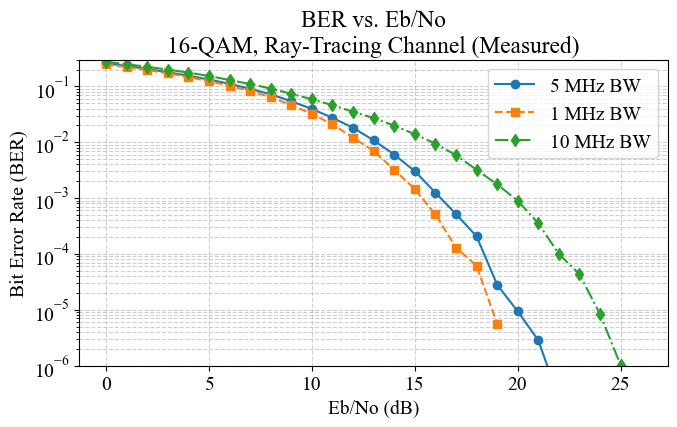

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


# -------------------- 5 MHz data --------------------
ebno_5 = np.arange(0, 25, 1)  # 0 … 24 dB
ber_5 = np.array([
    2.5805e-01, 2.3201e-01, 2.0465e-01, 1.7944e-01, 1.5505e-01,
    1.3240e-01, 1.1121e-01, 9.0307e-02, 7.2141e-02, 5.4146e-02,
    3.9413e-02, 2.7334e-02, 1.8107e-02, 1.0811e-02, 6.0069e-03,
    3.0314e-03, 1.2487e-03, 5.1626e-04, 2.0599e-04, 2.7974e-05,
    9.3248e-06, 2.8257e-06, 2.5431e-07, 2.5431e-07, 0.0
])

# -------------------- 1 MHz data --------------------
ebno_1 = np.arange(0, 21, 1)  # 0 … 20 dB
ber_1 = np.array([
    2.4732e-01, 2.2207e-01, 1.9651e-01, 1.7086e-01, 1.4714e-01,
    1.2350e-01, 1.0245e-01, 8.2308e-02, 6.3962e-02, 4.6333e-02,
    3.2130e-02, 2.0851e-02, 1.2095e-02, 6.9402e-03, 3.2145e-03,
    1.4445e-03, 5.0863e-04, 1.2970e-04, 6.1035e-05, 5.5949e-06,
    0.0
])

# -------------------- 10 MHz data --------------------
ebno_10 = np.arange(0, 27, 1)  # 0 … 26 dB
ber_10 = np.array([
    2.7446e-01, 2.4936e-01, 2.2368e-01, 1.9999e-01, 1.7641e-01,
    1.5318e-01, 1.3009e-01, 1.0996e-01, 9.1525e-02, 7.3621e-02,
    5.8820e-02, 4.6089e-02, 3.5144e-02, 2.7067e-02, 1.9814e-02,
    1.3883e-02, 9.4299e-03, 5.8416e-03, 3.2120e-03, 1.7522e-03,
    8.9518e-04, 3.5350e-04, 9.9182e-05, 4.3233e-05, 8.2652e-06,
    1.0173e-06, 0.0000e+00
])

# -------------------- Plot the three bandwidths ---------------------------
fig, ax = plt.subplots(figsize=(7, 4.5))

# Plot all three BW curves
ax.semilogy(ebno_5, ber_5_plot, 'o-', label='5 MHz BW')
ax.semilogy(ebno_1, ber_1_plot, 's--', label='1 MHz BW')
ax.semilogy(ebno_10, ber_10, 'd-.', label='10 MHz BW')

# Cosmetics
ax.set_xlabel('Eb/No (dB)')
ax.set_ylabel('Bit Error Rate (BER)')
ax.set_title('BER vs. Eb/No\n16-QAM, Ray-Tracing Channel (Measured)')
ax.grid(True, which='both', linestyle='--', alpha=0.6)
ax.set_ylim(1e-6, 3e-1)
ax.legend()

plt.tight_layout()
plt.show()

